# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
my_btc_price = btc_response['data']['1']['quotes']['USD']['price']
my_btc_price
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
my_eth_price = eth_response['data']['1027']['quotes']['USD']['price']
my_eth_price

# Compute current value of my crpto
my_btc_value = my_btc_price * 1.2
my_eth_value = my_eth_price * 5.3


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35841.60
The current value of your 5.3 ETH is $8690.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2023-10-18',tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(tickers,timeframe,start=today).df
# Reorganize the DataFrame

# Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol",axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol",axis=1)



# Concatenate the ticker DataFrames
#df_ticker = pd.concat([AGG,SPY], axis=1, keys=["AGG", "SPY"])
ticker_data = pd.concat([AGG, SPY],axis=1, keys=["AGG", "SPY"])


# Preview DataFrame
ticker_data.head()
# YOUR CODE HERE!

AGG                                      \
                           close    high      low trade_count   open   
timestamp                                                              
2023-10-18 04:00:00+00:00  92.02  92.375  91.9400       31233  92.29   
2023-10-19 04:00:00+00:00  91.67  92.165  91.6100       39249  91.89   
2023-10-20 04:00:00+00:00  92.00  92.135  91.9006       25643  91.94   

                                                   SPY                   \
                             volume       vwap   close    high      low   
timestamp                                                                 
2023-10-18 04:00:00+00:00   9352743  92.096451  430.21  435.18  429.090   
2023-10-19 04:00:00+00:00  11552719  91.803337  426.43  432.82  425.725   
2023-10-20 04:00:00+00:00   6630026  92.007834  421.19  426.54  421.080   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2023-10-18 04:00:00+00:00      691077  434.19   93559799  432.132728  
2023-10-19 04:00:00+00:00      880806  430.95  121322959  428.955351  
2023-10-20 04:00:00+00:00      733333  425.98  123919876  423.466599

In [9]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close'][0]
spy_close_price = ticker_data['SPY']['close'][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $92.02
Current SPY closing price: $430.21


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# YOUR CODE HERE!

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21510.50
The current value of your 200 AGG shares is $18404.00


### Savings Health Analysis

In [11]:
# Set monthly household income
household_income = 12000

# Consolidate financial assets data
savings = [my_agg_value + my_spy_value, my_btc_value + my_eth_value] 
savings
# Create savings DataFrame
df_savings = pd.DataFrame(savings, columns=['amount'],index=['stock','crypto'])
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,amount
stock,39914.500
crypto,44531.745


<Axes: ylabel='amount'>

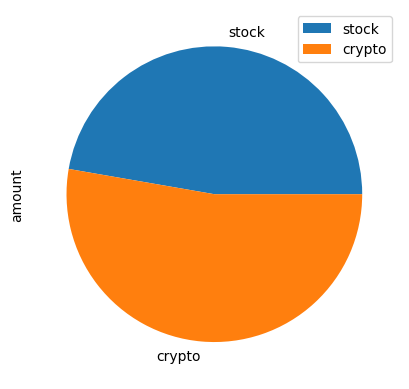

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')
# YOUR CODE HERE!

In [13]:
# Set ideal emergency fund
emergency_fund = household_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
print(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    print('congratulations for having enough money in this fund')
elif total_savings == emergency_fund:
    print('congratulations on reaching you financial goals')
elif total_savings < emergency_fund:
    print(f'you are{emergency_fund - total_savings}away from your goal')
# YOUR CODE HERE!

84446.245
congratulations for having enough money in this fund


C:\Users\tyler\AppData\Local\Temp\ipykernel_24064\1551101117.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  total_savings = float(df_savings.sum())


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-10-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-10-17', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame

# Separate ticker data
AGG = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol",axis=1)
SPY = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol",axis=1)



# Concatenate the ticker DataFrames
#df_ticker = pd.concat([AGG,SPY], axis=1, keys=["AGG", "SPY"])
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                         \
                            close      high      low trade_count    open   
timestamp                                                                  
2018-10-17 04:00:00+00:00  104.53  104.7700  104.520       13135  104.71   
2018-10-18 04:00:00+00:00  104.46  104.6195  104.375       13495  104.39   
2018-10-19 04:00:00+00:00  104.37  104.5500  104.340       13175  104.47   
2018-10-22 04:00:00+00:00  104.35  104.5200  104.340       11391  104.47   
2018-10-23 04:00:00+00:00  104.48  104.7400  104.475       14144  104.67   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2018-10-17 04:00:00+00:00  3011206  104.638046  280.4200  281.15  277.56   
2018-10-18 04:00:00+00:00  3550735  104.496375  276.3900  280.07  274.97   
2018-10-19 04:00:00+00:00  3105921  104.390878  276.1797  279.30  275.47   
2018-10-22 04:00:00+00:00  2948119  104.408492  275.0300  277.36  274.41   
2018-10-23 04:00:00+00:00  3695313  104.605860  273.5200  274.87  268.61   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-10-17 04:00:00+00:00      566703  280.44  111897958  279.897689  
2018-10-18 04:00:00+00:00      747569  279.40  137804219  277.099534  
2018-10-19 04:00:00+00:00      582243  277.13  140662678  277.063759  
2018-10-22 04:00:00+00:00      449535  277.00   83420677  275.565255  
2018-10-23 04:00:00+00:00      837023  270.95  148031789  271.959702

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Mc_30years = MCSimulation(
    portfolio_data=df_stock_data, 
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*30)


In [17]:
# Printing the simulation input data
Mc_30years.portfolio_data.head()
# YOUR CODE HERE!

AGG                                         \
                            close      high      low trade_count    open   
timestamp                                                                  
2018-10-17 04:00:00+00:00  104.53  104.7700  104.520       13135  104.71   
2018-10-18 04:00:00+00:00  104.46  104.6195  104.375       13495  104.39   
2018-10-19 04:00:00+00:00  104.37  104.5500  104.340       13175  104.47   
2018-10-22 04:00:00+00:00  104.35  104.5200  104.340       11391  104.47   
2018-10-23 04:00:00+00:00  104.48  104.7400  104.475       14144  104.67   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2018-10-17 04:00:00+00:00  3011206  104.638046          NaN  280.4200  281.15   
2018-10-18 04:00:00+00:00  3550735  104.496375    -0.000670  276.3900  280.07   
2018-10-19 04:00:00+00:00  3105921  104.390878    -0.000862  276.1797  279.30   
2018-10-22 04:00:00+00:00  2948119  104.408492    -0.000192  275.0300  277.36   
2018-10-23 04:00:00+00:00  3695313  104.605860     0.001246  273.5200  274.87   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2018-10-17 04:00:00+00:00  277.56      566703  280.44  111897958  279.897689   
2018-10-18 04:00:00+00:00  274.97      747569  279.40  137804219  277.099534   
2018-10-19 04:00:00+00:00  275.47      582243  277.13  140662678  277.063759   
2018-10-22 04:00:00+00:00  274.41      449535  277.00   83420677  275.565255   
2018-10-23 04:00:00+00:00  268.61      837023  270.95  148031789  271.959702   

                                        
                          daily_return  
timestamp                               
2018-10-17 04:00:00+00:00          NaN  
2018-10-18 04:00:00+00:00    -0.014371  
2018-10-19 04:00:00+00:00    -0.000761  
2018-10-22 04:00:00+00:00    -0.004163  
2018-10-23 04:00:00+00:00    -0.005490

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Mc_30years.calc_cumulative_return()
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 110.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 120.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 130.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 140.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 150.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 160.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 170.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 180.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 190.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 200.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 210.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 220.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 230.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 240.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 250.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 260.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 270.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 280.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 290.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 300.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 310.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 320.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 330.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 340.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 350.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 360.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 370.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 380.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 390.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 400.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 410.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 420.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 430.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 440.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 450.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 460.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 470.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 480.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

Running Monte Carlo simulation number 490.


C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\tyler\OneDrive\Homework\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: Pe

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007756,0.996876,0.996349,0.987681,1.006689,0.996709,0.993670,1.000196,1.005028,0.993301,...,0.993558,0.997542,1.000896,1.000601,1.014764,0.983526,1.001267,0.994369,1.003535,1.002158
2,0.990818,0.994481,0.989645,0.993045,1.005034,0.985378,0.981520,1.002247,1.001634,0.984226,...,0.980271,0.989910,0.991808,0.988289,1.015512,0.964569,0.990626,0.985683,1.004877,1.002031
3,0.988984,0.990877,0.991543,0.999342,1.006074,0.969221,0.970412,1.017569,1.004898,0.995805,...,0.976894,0.995060,0.980545,0.995464,1.028264,0.960761,0.981171,0.992535,1.006978,1.004356
4,0.985361,0.976873,0.994097,1.003421,1.013574,0.971769,0.964494,1.031404,1.011659,1.013955,...,0.975047,0.982246,0.984361,0.984969,1.035008,0.958636,0.979643,0.982344,1.005567,0.996299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.058915,3.663382,3.671776,8.021030,6.414468,5.833953,0.792853,4.687194,1.979699,5.266268,...,11.915948,1.088071,7.701415,8.811947,5.932388,1.003212,3.706259,7.181629,1.026995,2.914652
7557,4.056016,3.625715,3.693234,8.073312,6.396234,5.869190,0.785039,4.709732,1.975983,5.295661,...,11.865867,1.091617,7.690317,8.732567,5.947781,1.005921,3.721368,7.218374,1.039680,2.919172
7558,4.060379,3.629750,3.683785,7.973012,6.430639,5.854687,0.789900,4.707784,1.952813,5.279807,...,11.963267,1.096239,7.578133,8.618616,5.906164,1.003645,3.833640,7.160175,1.042701,2.944166
7559,4.042919,3.599760,3.717417,8.018743,6.501810,5.869906,0.804104,4.720133,1.939757,5.272651,...,11.918973,1.104403,7.599986,8.526464,5.881043,1.027723,3.815421,7.209502,1.054896,2.927752


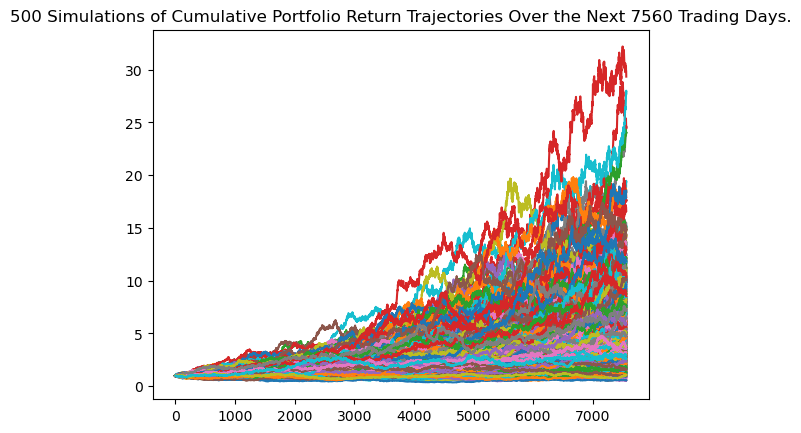

In [19]:
# Plot simulation outcomes
line_plot = Mc_30years.plot_simulation()
# YOUR CODE HERE!

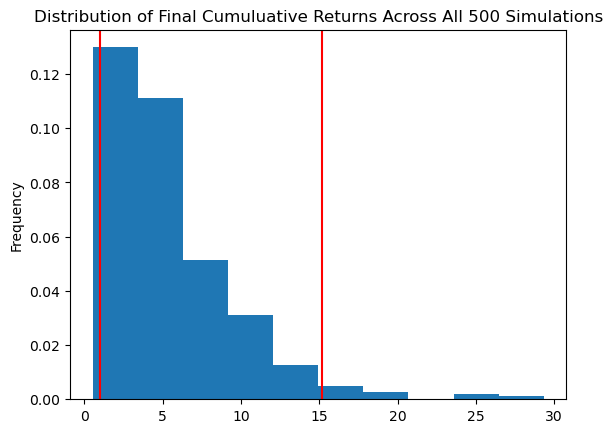

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = Mc_30years.plot_distribution()
# YOUR CODE HERE!

### Retirement Analysis

In [22]:
#!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.2
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alpaca-trade-api              3.0.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautifulsoup4                4.12.2
binaryor

In [24]:
#!pip install pandas==1.5

     ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
     --------------------------------------- 0.0/10.4 MB 262.6 kB/s eta 0:00:40
     --------------------------------------- 0.0/10.4 MB 245.8 kB/s eta 0:00:42
     --------------------------------------- 0.1/10.4 MB 547.6 kB/s eta 0:00:19
      -------------------------------------- 0.2/10.4 MB 919.0 kB/s eta 0:00:12
     - -------------------------------------- 0.4/10.4 MB 1.3 MB/s eta 0:00:08
     -- ------------------------------------- 0.6/10.4 MB 1.8 MB/s eta 0:00:06
     --- ------------------------------------ 0.8/10.4 MB 2.2 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/10.4 MB 2.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.2/10.4 MB 2.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.5/10.4 MB 2.9 MB/s et

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geopandas 0.9.0 requires fiona>=1.8, which is not installed.


In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_st = Mc_30years.summarize_cumulative_return()
# YOUR CODE HERE!

# Print summary statistics
print(summary_st)
# YOUR CODE HERE!

AttributeError: 'Series' object has no attribute 'concat'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_st[]*20000,)
ci_upper = round(summary_st[]*20000,)
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")